Dropdown(description='Date:', index=4, options=('2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-0…

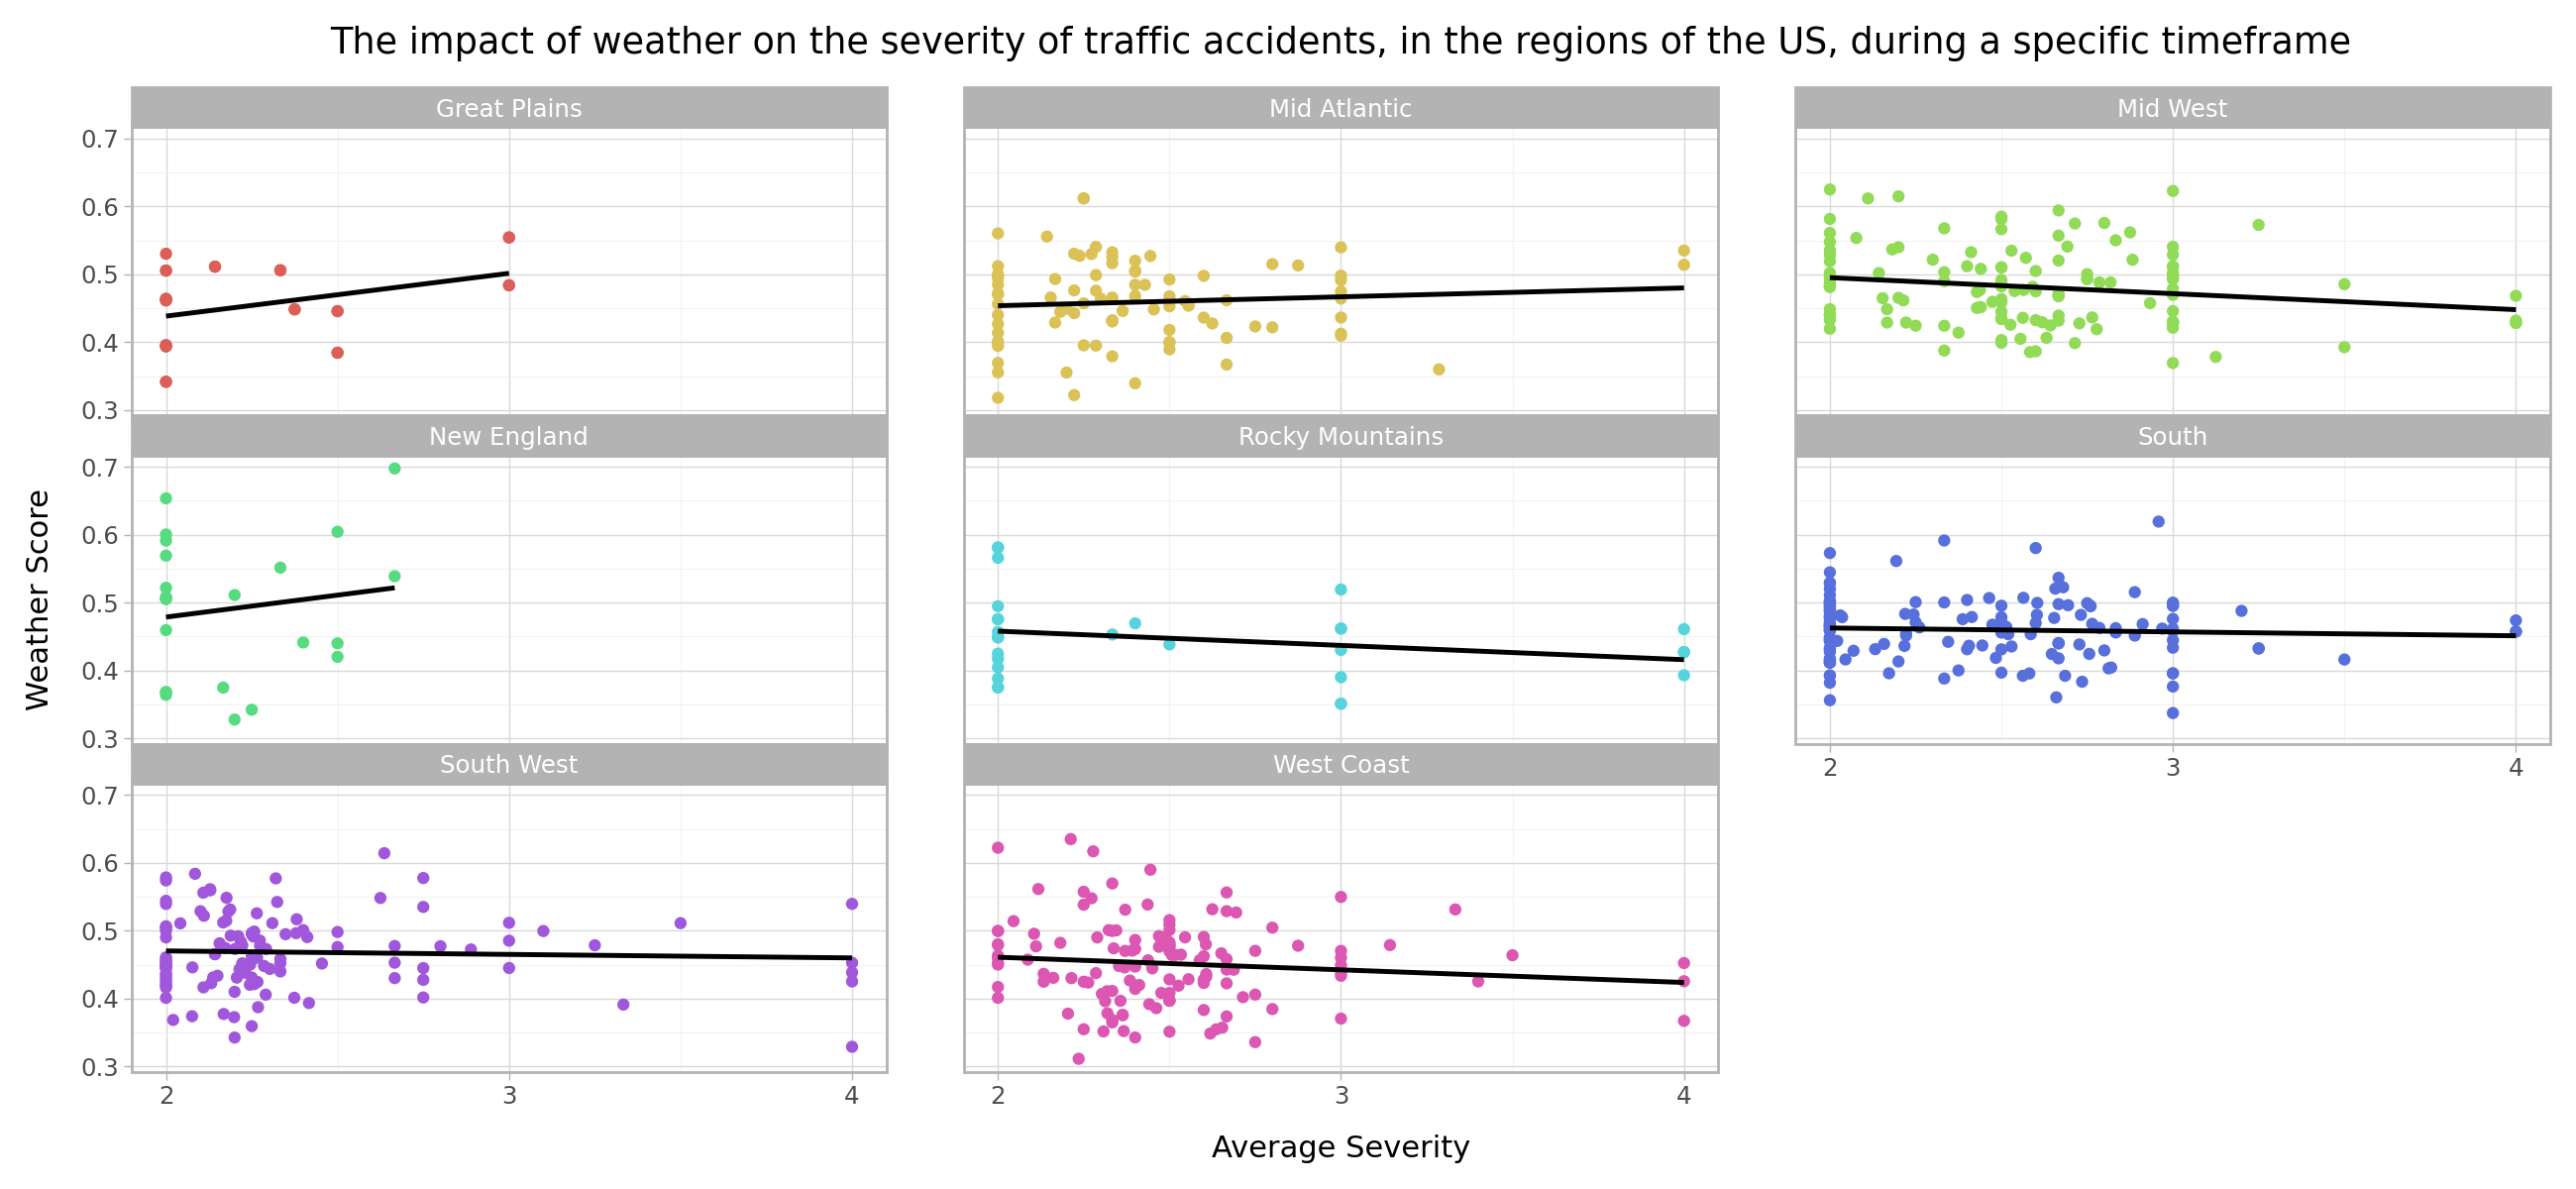

In [1]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, facet_wrap, labs, theme_light, theme, scale_x_continuous, ggtitle, geom_smooth
import ipywidgets as widgets
from ipywidgets import GridspecLayout
import plotly.graph_objects as go
from IPython.display import display, clear_output
import plotly.express as px
from plotly.subplots import make_subplots

data = pd.read_csv('F_PlotData.csv')


data['Date'] = pd.to_datetime(data['Date'])

def update_figure(selected_date):
    filtered_data = data[data['Date'].dt.to_period('M') == selected_date]
    
    p = ggplot(filtered_data, aes(x='Average_Severity', y='Weather_Score', color='Region')) + \
        geom_point() + \
        geom_smooth(method='lm', se=False, color='black') + \
        facet_wrap('~Region', ncol=3) + \
        labs(x="Average Severity", y="Weather Score") + \
        ggtitle('The impact of weather on the severity of traffic accidents, in the regions of the US, during a specific timeframe') + \
        theme_light() + \
        theme(legend_position='none') + \
        theme(panel_spacing_y=0, panel_spacing_x=0.03) + \
        scale_x_continuous(limits=(2, 4), breaks=range(1, 5)) + \
        theme(figure_size=(13, 6)) 
    
    clear_output(wait=True)
    display(date_dropdown)
    display(p)

dates = ['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04', '2017-07', '2017-10']
date_dropdown = widgets.Dropdown(
    options=dates,
    value='2017-01',
    description='Date:'
)
display(date_dropdown)

def on_date_change(change):
    update_figure(change.new)

date_dropdown.observe(on_date_change, names='value')

update_figure('2017-01')
